# Analyzing money in politics - Prop 66

Notebook created for the MOOC 'Python for journalists', by Ben Welsh in Knight Center for Journalism in the Americas

In [97]:
import pandas as pd

In [98]:
matplotlib inline

**Reading in the list of propositions and committees**

In [99]:
props = pd.read_csv("http://www.firstpythonnotebook.org/_static/committees.csv")

In [100]:
props.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name,committee_position
0,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,382,1374469,YES ON PROPOSITION 51 - CALIFORNIANS FOR QUALI...,SUPPORT
1,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,383,1220380,COMMUNITY COLLEGE FACILITY COALITION ISSUES CO...,SUPPORT
2,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,384,1282321,TORLAKSON'S INVEST IN CALIFORNIA A BALLOT MEAS...,SUPPORT
3,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,385,1382843,CALIFORNIA TAXPAYERS AND EDUCATORS OPPOSED TO ...,OPPOSE
4,ocd-contest/85990193-9d6f-4600-b8e7-bf1317841d82,1362198,71,PROPOSITION 052 - STATE FEES ON HOSPITALS. FED...,386,1362973,YES ON PROPOSITION 52 - A COALITION OF CALIFOR...,SUPPORT


In [101]:
props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
ocd_prop_id               102 non-null object
calaccess_prop_id         102 non-null int64
ccdc_prop_id              102 non-null int64
prop_name                 102 non-null object
ccdc_committee_id         102 non-null int64
calaccess_committee_id    102 non-null int64
committee_name            102 non-null object
committee_position        102 non-null object
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


**Reading in the list of contributions to ballot measures**

In [102]:
contribs = pd.read_csv("http://www.firstpythonnotebook.org/_static/contributions.csv")

In [103]:
contribs.head()

,calaccess_committee_id,committee_name,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,BERGMAN,GRETCHEN,SPRING VALLEY,CA,91978,A NEW PATH,EXECUTIVE DIRECTOR,False,84.0
1,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,KAHLE,MYRNA,SAN DIEGO,CA,92109,NATIONAL SCHOOL DISTRICT,TEACHER,False,35.0
2,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-15,MCDEVITT,LEO,ESCONDIDO,CA,92025,LIFE IONIZERS,SEO/CONTENT MANAGER,False,198.0
3,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-08-10,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,False,-50.0
4,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-26,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,True,50.0


In [104]:
contribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56379 entries, 0 to 56378
Data columns (total 13 columns):
calaccess_committee_id          56379 non-null int64
committee_name                  56379 non-null object
calaccess_filing_id             56379 non-null int64
date_received                   56379 non-null object
contributor_lastname            56375 non-null object
contributor_firstname           53411 non-null object
contributor_city                56369 non-null object
contributor_state               56363 non-null object
contributor_zip                 56366 non-null object
contributor_employer            48572 non-null object
contributor_occupation          53273 non-null object
contributor_is_self_employed    56379 non-null bool
amount                          56379 non-null float64
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 5.2+ MB


**Finding the propositions with more committees**

In [105]:
props.prop_name.value_counts().reset_index()

,index,prop_name
0,PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE...,13
1,PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTH...,12
2,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,11
3,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,9
4,PROPOSITION 055 - TAX EXTENSION TO FUND EDUCAT...,8
5,PROPOSITION 067- REFERENDUM TO OVERTURN BAN ON...,7
6,PROPOSITION 062- DEATH PENALTY. INITIATIVE STA...,7
7,"PROPOSITION 059- SB 254 (CHAPTER 20, STATUTES ...",6
8,PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...,4
9,PROPOSITION 054 - LEGISLATURE. LEGISLATION AND...,4


**Looking at the employer with more contributors to different propositions**

In [106]:
contribs.contributor_employer.value_counts().reset_index()

,index,contributor_employer
0,STATE OF CALIFORNIA,28787
1,NONE,3011
2,RETIRED,994
3,UNEMPLOYED,875
4,SELF - EMPLOYED - NO BUSINESS NAME,284
5,NOT EMPLOYED,109
6,STANFORD UNIVERSITY,93
7,KAISER PERMANENTE,74
8,SELF,71
9,SELF-EMPLOYED/SAME NAME,69


In [107]:
props.prop_name.value_counts()

PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE CRIMINAL PROCEEDINGS AND SENTENCING. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE.                           13
PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTHCARE, TOBACCO USE PREVENTION, RESEARCH, AND LAW ENFORCEMENT. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE.    12
PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE.                                                                                                   11
PROPOSITION 066- DEATH PENALTY. PROCEDURES. INITIATIVE STATUTE.                                                                                                 9
PROPOSITION 055 - TAX EXTENSION TO FUND EDUCATION AND HEALTHCARE. INITIATIVE CONSTITUTIONAL AMENDMENT.                                                          8
PROPOSITION 067- REFERENDUM TO OVERTURN BAN ON SINGLE-USE PLASTIC BAGS.                                                                                         7
PROPOSITION 062- DEATH PENAL

**Analyzing the Proposition 66, about Death Penalty, procedures**

In [108]:
props[props.prop_name == "PROPOSITION 066- DEATH PENALTY. PROCEDURES. INITIATIVE STATUTE."]

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name,committee_position
86,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT
87,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,469,1302403,CALIFORNIA CORRECTIONAL PEACE OFFICERS ASSOCIA...,SUPPORT
88,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE
89,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,471,1386494,PROTEUS ACTION LEAGUE NON-PROFIT 501 (C)(4) OR...,OPPOSE
90,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,472,1380590,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",OPPOSE
91,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,473,1391170,"MILLION VOTER PROJECT ACTION FUND - YES ON 55,...",OPPOSE
92,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,474,1317554,SAN FRANCISCO POLICE OFFICERS ASSOCIATION ISSU...,SUPPORT
93,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,475,1336580,LOS ANGELES POLICE PROTECTIVE LEAGUE ISSUES PA...,SUPPORT
94,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,476,1383946,"NO ON PROP 66, CALIFORNIANS FOR FAIR JUSTICE, ...",OPPOSE


In [109]:
prop = props[props.prop_name == "PROPOSITION 066- DEATH PENALTY. PROCEDURES. INITIATIVE STATUTE."]

In [110]:
prop.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name,committee_position
86,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT
87,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,469,1302403,CALIFORNIA CORRECTIONAL PEACE OFFICERS ASSOCIA...,SUPPORT
88,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE
89,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,471,1386494,PROTEUS ACTION LEAGUE NON-PROFIT 501 (C)(4) OR...,OPPOSE
90,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,472,1380590,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",OPPOSE


In [111]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 86 to 94
Data columns (total 8 columns):
ocd_prop_id               9 non-null object
calaccess_prop_id         9 non-null int64
ccdc_prop_id              9 non-null int64
prop_name                 9 non-null object
ccdc_committee_id         9 non-null int64
calaccess_committee_id    9 non-null int64
committee_name            9 non-null object
committee_position        9 non-null object
dtypes: int64(4), object(4)
memory usage: 648.0+ bytes


In [112]:
contribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56379 entries, 0 to 56378
Data columns (total 13 columns):
calaccess_committee_id          56379 non-null int64
committee_name                  56379 non-null object
calaccess_filing_id             56379 non-null int64
date_received                   56379 non-null object
contributor_lastname            56375 non-null object
contributor_firstname           53411 non-null object
contributor_city                56369 non-null object
contributor_state               56363 non-null object
contributor_zip                 56366 non-null object
contributor_employer            48572 non-null object
contributor_occupation          53273 non-null object
contributor_is_self_employed    56379 non-null bool
amount                          56379 non-null float64
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 5.2+ MB


**Joining propositions and contributions files to get the contributors to proposition 66**

In [113]:
pd.merge(prop, contribs, on="calaccess_committee_id")

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-03,SACRAMENTO COUNTY DEPUTY SHERIFFS' ASSOCIATION,NaN,SACRAMENTO,CA,95814,NaN,NaN,False,60000.0
1,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-11,SAN FRANCISCO POLICE OFFICER ASSOCIATION,NaN,SAN FRANCISCO,CA,94103,NaN,NaN,False,60000.0
2,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-14,SAN DIEGANS AGAINST CRIME PAC,NaN,ENCINITAS,CA,92024,NaN,NaN,False,25000.0
3,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-17,SAN DIEGO COUNTY DA ASSOCIATION,NaN,SAN DIEGO,CA,92101,NaN,NaN,False,25000.0
4,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-21,ASSOCIATION OF ORANGE COUNTY DEPUTY SHERIFFS I...,NaN,SACRAMENTO,CA,95814,NaN,NaN,False,20000.0
5,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-21,LAW ENFORCEMENT MANAGERS ASSOCIATION,NaN,SACRAMENTO,CA,95811,NaN,NaN,False,10000.0
6,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-28,PEACE OFFICERS RESEARCH ASSOCIATION OF CALIFOR...,NaN,SACRAMENTO,CA,95834,NaN,NaN,False,50000.0
7,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-30,THE CALIFORNIA ASSOCIATION OF HIGHWAY PATROLMEN,NaN,SACRAMENTO,CA,95818,NaN,NaN,False,100000.0
8,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-10-05,ASSOCIATION FOR LOS ANGELES DEPUTY SHERIFFS ST...,NaN,MONTEREY PARK,CA,91755,NaN,NaN,False,100000.0
9,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-10-12,ASSOCIATION OF DEPUTY DISTRICT ATTORNEYS,NaN,LOS ANGELES,CA,90013,NaN,NaN,False,100000.0


In [114]:
merged = pd.merge(prop, contribs, on="calaccess_committee_id")

In [115]:
merged.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-03,SACRAMENTO COUNTY DEPUTY SHERIFFS' ASSOCIATION,NaN,SACRAMENTO,CA,95814,NaN,NaN,False,60000.0
1,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-11,SAN FRANCISCO POLICE OFFICER ASSOCIATION,NaN,SAN FRANCISCO,CA,94103,NaN,NaN,False,60000.0
2,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-14,SAN DIEGANS AGAINST CRIME PAC,NaN,ENCINITAS,CA,92024,NaN,NaN,False,25000.0
3,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-17,SAN DIEGO COUNTY DA ASSOCIATION,NaN,SAN DIEGO,CA,92101,NaN,NaN,False,25000.0
4,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-09-21,ASSOCIATION OF ORANGE COUNTY DEPUTY SHERIFFS I...,NaN,SACRAMENTO,CA,95814,NaN,NaN,False,20000.0


In [116]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33828 entries, 0 to 33827
Data columns (total 20 columns):
ocd_prop_id                     33828 non-null object
calaccess_prop_id               33828 non-null int64
ccdc_prop_id                    33828 non-null int64
prop_name                       33828 non-null object
ccdc_committee_id               33828 non-null int64
calaccess_committee_id          33828 non-null int64
committee_name_x                33828 non-null object
committee_position              33828 non-null object
committee_name_y                33828 non-null object
calaccess_filing_id             33828 non-null int64
date_received                   33828 non-null object
contributor_lastname            33824 non-null object
contributor_firstname           33288 non-null object
contributor_city                33825 non-null object
contributor_state               33824 non-null object
contributor_zip                 33825 non-null object
contributor_employer            

In [117]:
merged.amount.sum()

34291239.299999997

In [118]:
merged.committee_position.value_counts()

SUPPORT    29633
OPPOSE      4195
Name: committee_position, dtype: int64

**Finding which committees got more money**

In [119]:
support = merged[merged.committee_position=="SUPPORT"]

In [120]:
oppose = merged[merged.committee_position=="OPPOSE"]

In [121]:
support.amount.sum()

16836069.809999999

In [122]:
oppose.amount.sum()

17455169.490000002

In [123]:
support.amount.sum() / merged.amount.sum()

0.49097291768046425

In [124]:
merged.sort_values("amount", ascending=False)

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
29634,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-09-15,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1970000.0
33752,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,473,1391170,"MILLION VOTER PROJECT ACTION FUND - YES ON 55,...",OPPOSE,"MILLION VOTER PROJECT ACTION FUND - YES ON 55,...",2098635,2016-10-13,STEYER,THOMAS,SAN FRANCISCO,CA,94104-4919,FARALLON CAPITAL,FOUNDER,False,1500000.0
29635,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2096507,2016-09-27,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1403000.0
29633,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-07-07,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1000000.0
29631,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2057298,2016-05-03,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,550000.0
32841,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,472,1380590,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",OPPOSE,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",2098423,2016-09-29,OPEN SOCIETY POLICY CENTER INC.,NaN,WASHINGTON,DC,20003,NaN,NaN,False,500000.0
32774,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,472,1380590,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",OPPOSE,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",2098423,2016-10-03,MCKEOWN,NICHOLAS,PORTOLA VALLEY,CA,94028,STANFORD UNIVERSITY,PROFESSOR,False,500000.0
32559,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,472,1380590,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",OPPOSE,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",2098423,2016-10-10,DOERR,L. JOHN,SAN CARLOS,CA,94070,KLEINER PERKINS CAUFIELD & BYERS,VENTURE CAPITALIST,False,500000.0
30799,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,472,1380590,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",OPPOSE,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",2064020,2016-04-13,"LAURENE POWELL JOBS, INCLUDING EMERSON COLLECT...",NaN,PALO ALTO,CA,94301,NaN,NaN,False,500000.0
29636,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2096507,2016-10-19,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,500000.0


In [125]:
oppose.sort_values("amount", ascending=False)

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
29634,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-09-15,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1970000.0
33752,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,473,1391170,"MILLION VOTER PROJECT ACTION FUND - YES ON 55,...",OPPOSE,"MILLION VOTER PROJECT ACTION FUND - YES ON 55,...",2098635,2016-10-13,STEYER,THOMAS,SAN FRANCISCO,CA,94104-4919,FARALLON CAPITAL,FOUNDER,False,1500000.0
29635,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2096507,2016-09-27,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1403000.0
29633,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-07-07,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1000000.0
29631,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2057298,2016-05-03,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,550000.0
29636,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2096507,2016-10-19,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,500000.0
32559,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,472,1380590,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",OPPOSE,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",2098423,2016-10-10,DOERR,L. JOHN,SAN CARLOS,CA,94070,KLEINER PERKINS CAUFIELD & BYERS,VENTURE CAPITALIST,False,500000.0
30799,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,472,1380590,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",OPPOSE,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",2064020,2016-04-13,"LAURENE POWELL JOBS, INCLUDING EMERSON COLLECT...",NaN,PALO ALTO,CA,94301,NaN,NaN,False,500000.0
32774,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,472,1380590,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",OPPOSE,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",2098423,2016-10-03,MCKEOWN,NICHOLAS,PORTOLA VALLEY,CA,94028,STANFORD UNIVERSITY,PROFESSOR,False,500000.0
29934,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,472,1380590,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",OPPOSE,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",2038035,2016-03-07,GRAHAM,PAUL,MOUNTAIN VEW,CA,94041,Y COMBINATOR,CHIEF EXECUTIVE OFFICER,False,500000.0


In [126]:
support.sort_values("amount", ascending=False).head(10)

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
524,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",2064651,2016-05-05,NICHOLAS III,HENRY T.,ALISO VIEJO,CA,92656,"HENRY T. NICHOLAS, III FOUNDATION / NICHOLAS E...",PHILANTHROPIST / BUSINESS EXECUTIVE,False,200000.0
292,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2064651,2016-05-05,NICHOLAS III,HENRY T.,ALISO VIEJO,CA,92656,"HENRY T. NICHOLAS, III FOUNDATION / NICHOLAS E...",PHILANTHROPIST / BUSINESS EXECUTIVE,False,200000.0
17,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2012262,2015-11-05,LOS ANGELES POLICE PROTECTIVE LEAGUE ISSUES PAC,NaN,SACRAMENTO,CA,95814,NaN,NaN,False,125000.0
1012,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",2130372,2016-12-08,CALIFORNIA CORRECTIONAL PEACE OFFICERS ASSOCIA...,NaN,SACRAMENTO,CA,95814,NaN,NaN,False,125000.0
974,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2130372,2016-12-08,CALIFORNIA CORRECTIONAL PEACE OFFICERS ASSOCIA...,NaN,SACRAMENTO,CA,95814,NaN,NaN,False,125000.0
42,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",2012262,2015-11-05,LOS ANGELES POLICE PROTECTIVE LEAGUE ISSUES PAC,NaN,SACRAMENTO,CA,95814,NaN,NaN,False,125000.0
32,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",2012262,2015-09-30,THE CALIFORNIA ASSOCIATION OF HIGHWAY PATROLMEN,NaN,SACRAMENTO,CA,95818,NaN,NaN,False,100000.0
35,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",2012262,2015-10-12,CALIFORNIA CORRECTIONAL PEACE OFFICERS ASSOCIA...,NaN,SACRAMENTO,CA,95814,NaN,NaN,False,100000.0
209,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2064651,2016-04-15,THE CALIFORNIA ASSOCIATION OF HIGHWAY PATROLMEN,NaN,SACRAMENTO,CA,95818,NaN,NaN,False,100000.0
327,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,468,1346266,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",SUPPORT,"CALIFORNIANS FOR JUSTICE AND PUBLIC SAFETY, NO...",2064651,2016-05-16,SAN BERNARDINO COUNTY SAFETY EMPLOYEES' BENEFI...,NaN,SAN BERNARDINO,CA,92408,NaN,NaN,False,100000.0


In [127]:
oppose.sort_values("amount", ascending=False).head(5)

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
29634,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-09-15,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1970000.0
33752,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,473,1391170,"MILLION VOTER PROJECT ACTION FUND - YES ON 55,...",OPPOSE,"MILLION VOTER PROJECT ACTION FUND - YES ON 55,...",2098635,2016-10-13,STEYER,THOMAS,SAN FRANCISCO,CA,94104-4919,FARALLON CAPITAL,FOUNDER,False,1500000.0
29635,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2096507,2016-09-27,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1403000.0
29633,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-07-07,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1000000.0
29631,ocd-contest/19eca91d-e494-4ee0-a345-8f96eeec8a3e,1381724,85,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,470,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),OPPOSE,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2057298,2016-05-03,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,550000.0


In [128]:
merged.groupby("committee_name_x").amount.sum()

committee_name_x
CALIFORNIA CORRECTIONAL PEACE OFFICERS ASSOCIATION TRUTH IN AMERICAN GOVERNMENT FUND; NO ON PROPOSITION 62, YES ON PROPOSITION 66 (NON-PROFIT 501 (C) 5)    8.343218e+06
CALIFORNIANS TO MEND, NOT END, THE DEATH PENALTY. NO ON PROP 62, YES ON PROP 66. SUPPORTED BY PROSECUTORS, LAW ENFORCEMENT, AND FAMILIES OF VICTIMS.        8.387852e+06
FUND FOR POLICY REFORM (NONPROFIT 501(C)(4))                                                                                                                6.140000e+06
MILLION VOTER PROJECT ACTION FUND - YES ON 55, 56, 57, 58, 62, AND NO ON 66, SPONSORED BY SOCIAL JUSTICE ADVOCATES AND ORGANIZATIONS                        2.110000e+06
NO ON PROP 66, CALIFORNIANS FOR FAIR JUSTICE, SPONSORED BY SOCIAL JUSTICE ORGANIZATIONS                                                                     1.486701e+06
PROTEUS ACTION LEAGUE NON-PROFIT 501 (C)(4) ORGANIZATION, OPPOSING MEASURE 66 AND SUPPORTING MEASURES 54 AND 59                           

In [129]:
merged.groupby("committee_name_x").amount.sum().reset_index()

,committee_name_x,amount
0,CALIFORNIA CORRECTIONAL PEACE OFFICERS ASSOCIA...,8.343218e+06
1,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",8.387852e+06
2,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),6.140000e+06
3,"MILLION VOTER PROJECT ACTION FUND - YES ON 55,...",2.110000e+06
4,"NO ON PROP 66, CALIFORNIANS FOR FAIR JUSTICE, ...",1.486701e+06
5,PROTEUS ACTION LEAGUE NON-PROFIT 501 (C)(4) OR...,9.679012e+04
6,SAN FRANCISCO POLICE OFFICERS ASSOCIATION ISSU...,1.050000e+05
7,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",7.621678e+06


In [130]:
merged.groupby("committee_name_x").amount.sum().reset_index().sort_values("amount", ascending=False)

,committee_name_x,amount
1,"CALIFORNIANS TO MEND, NOT END, THE DEATH PENAL...",8.387852e+06
0,CALIFORNIA CORRECTIONAL PEACE OFFICERS ASSOCIA...,8.343218e+06
7,"YES ON 62, NO ON 66. REPLACE THE COSTLY, FAILE...",7.621678e+06
2,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),6.140000e+06
3,"MILLION VOTER PROJECT ACTION FUND - YES ON 55,...",2.110000e+06
4,"NO ON PROP 66, CALIFORNIANS FOR FAIR JUSTICE, ...",1.486701e+06
6,SAN FRANCISCO POLICE OFFICERS ASSOCIATION ISSU...,1.050000e+05
5,PROTEUS ACTION LEAGUE NON-PROFIT 501 (C)(4) OR...,9.679012e+04


**Finding the largest contributors to the Proposition 66**

In [131]:
merged.groupby(["contributor_firstname", "contributor_lastname"]).amount.sum().reset_index().sort_values("amount", ascending=False)

,contributor_firstname,contributor_lastname,amount
27807,THOMAS,STEYER,1750000.0
21360,NICHOLAS,MCKEOWN,1500000.0
23251,REED,HASTINGS,1000000.0
22042,PAUL,GRAHAM,500000.0
17056,L. JOHN,DOERR,500000.0
10991,HENRY T.,NICHOLAS III,400000.0
15862,JULIE,MOTAMEDI,350000.0
24168,ROBERT ALAN,EUSTACE,175000.0
27401,SUSAN,GROFF,160000.0
6984,DENISE,FODERARO,125000.0


In [132]:
merged.groupby(["contributor_firstname", "contributor_lastname", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False)

,contributor_firstname,contributor_lastname,committee_position,amount
27811,THOMAS,STEYER,OPPOSE,1750000.0
21364,NICHOLAS,MCKEOWN,OPPOSE,1500000.0
23255,REED,HASTINGS,OPPOSE,1000000.0
17059,L. JOHN,DOERR,OPPOSE,500000.0
22046,PAUL,GRAHAM,OPPOSE,500000.0
10993,HENRY T.,NICHOLAS III,SUPPORT,400000.0
15865,JULIE,MOTAMEDI,SUPPORT,350000.0
24172,ROBERT ALAN,EUSTACE,OPPOSE,175000.0
27405,SUSAN,GROFF,SUPPORT,160000.0
6986,DENISE,FODERARO,OPPOSE,125000.0


**Creating a barchart with the top supporters of proposition 66**

In [133]:
top_supporters = support.groupby(["contributor_firstname", "contributor_lastname"]).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

In [134]:
top_supporters['contributor_fullname'] = top_supporters.contributor_firstname + " " + top_supporters.contributor_lastname

In [135]:
top_supporters.head()

,contributor_firstname,contributor_lastname,amount,contributor_fullname
10519,HENRY T.,NICHOLAS III,400000.0,HENRY T. NICHOLAS III
15205,JULIE,MOTAMEDI,350000.0,JULIE MOTAMEDI
26206,SUSAN,GROFF,160000.0,SUSAN GROFF
6612,DEBRA JANE,STEINHARDT,100000.0,DEBRA JANE STEINHARDT
10280,H. F.,"BOECKMANN, II",100000.0,"H. F. BOECKMANN, II"


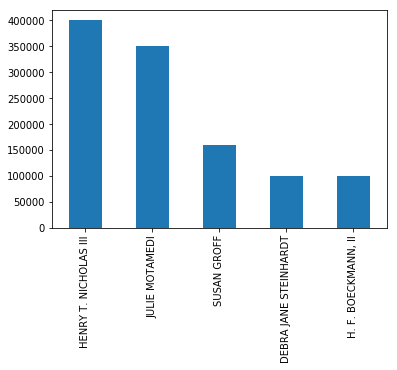

In [136]:
tschart = top_supporters.head(5).amount.plot.bar()
tschart.set_xticklabels(top_supporters.contributor_fullname)